In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jathiswarbhaskar","key":"01f0d2532bf8186ca08318efef0d5379"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d spscientist/students-performance-in-exams

  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 7.78MB/s]


In [ ]:
!ls

kaggle.json  sample_data  students-performance-in-exams.zip


In [ ]:
!unzip students-performance-in-exams.zip

Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


In [ ]:
!ls

kaggle.json  StudentsPerformance.csv
sample_data  students-performance-in-exams.zip


In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
data = pd.read_csv('StudentsPerformance.csv',sep=',')
data.shape

(1000, 8)

In [ ]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
passmark = 40
data['PassStatus'] = np.where((data['math score']+data['reading score']+data['writing score'])/3<passmark, 'F', 'P')
data.PassStatus.value_counts()

P    970
F     30
Name: PassStatus, dtype: int64

In [ ]:
data['Total_Marks'] = data['math score']+data['reading score']+data['writing score']
data['Percentage'] = data['Total_Marks']/3

def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

data['Grade'] = data.apply(lambda x : GetGrade(x['Percentage'], x['PassStatus']), axis=1)

data.Grade.value_counts()

B    261
C    256
A    198
D    182
E     73
F     30
Name: Grade, dtype: int64

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,PassStatus,Total_Marks,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,P,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,P,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,148,49.333333,E
4,male,group C,some college,standard,none,76,78,75,P,229,76.333333,B


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['PassStatus'] = encoder.fit_transform(data['PassStatus'])
data['gender'] = encoder.fit_transform(data['gender'])
data['lunch'] = encoder.fit_transform(data['lunch'])
data['parental level of education'] = encoder.fit_transform(data['parental level of education'])

In [ ]:
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

data['Grade'] = data['Grade'].replace('O', 0)
data['Grade'] = data['Grade'].replace('A', 1)
data['Grade'] = data['Grade'].replace('B', 2)
data['Grade'] = data['Grade'].replace('C', 3)
data['Grade'] = data['Grade'].replace('D', 4)
data['Grade'] = data['Grade'].replace('E', 5)

data['Grade'].value_counts()

1    261
2    256
0    198
3    182
4     73
5     30
Name: Grade, dtype: int64

In [ ]:
final_data = data.drop(['parental level of education','test preparation course'],axis=1)
final_data.head(5)

,gender,race/ethnicity,lunch,math score,reading score,writing score,PassStatus,Total_Marks,Percentage,Grade
0,0,2,1,72,72,74,1,218,72.666667,1
1,0,3,1,69,90,88,1,247,82.333333,0
2,0,2,1,90,95,93,1,278,92.666667,0
3,1,1,0,47,57,44,1,148,49.333333,4
4,1,3,1,76,78,75,1,229,76.333333,1


In [ ]:
x = final_data.iloc[:,final_data.columns!='PassStatus']
y = final_data.iloc[:,9]
x

,gender,race/ethnicity,lunch,math score,reading score,writing score,Total_Marks,Percentage,Grade
0,0,2,1,72,72,74,218,72.666667,1
1,0,3,1,69,90,88,247,82.333333,0
2,0,2,1,90,95,93,278,92.666667,0
3,1,1,0,47,57,44,148,49.333333,4
4,1,3,1,76,78,75,229,76.333333,1
...,...,...,...,...,...,...,...,...,...
995,0,5,1,88,99,95,282,94.000000,0
996,1,3,0,62,55,55,172,57.333333,3
997,0,3,0,59,71,65,195,65.000000,2
998,0,4,1,68,78,77,223,74.333333,1


Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

(750, 9)
(750,)
(250, 9)
(250,)
Training Accuracy : 1.0
Testing Accuracy : 1.0


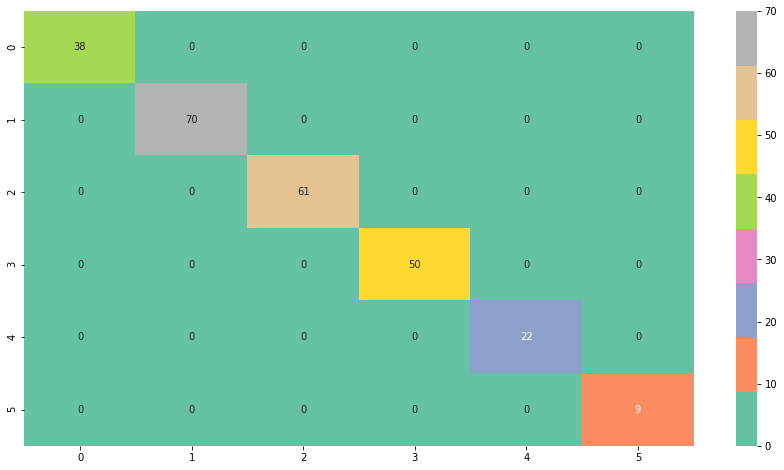

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(15,8))
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Set2')

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00         9

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



KNeighborsClassifier



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
x = final_data.iloc[:,final_data.columns!='gender']
y = final_data.iloc[:,final_data.columns=='gender']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)
mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

knn_model = KNeighborsClassifier(n_neighbors=3)
# fit the model
knn_model.fit(x_train, y_train)
# Accuracy
knn_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(knn_model.predict(x_test))
probs = pd.DataFrame(knn_model.predict_proba(x_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


In [ ]:
print("Training Accuracy :", knn_model.score(x_train, y_train))
print("Testing Accuracy :", knn_model.score(x_test, y_test))

Training Accuracy : 0.8928571428571429
Testing Accuracy : 0.7733333333333333


In [ ]:
plt.subplots(figsize=(15,8))
cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Set2')

In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)